In [53]:
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Utilities"
sys.path.append(path)

In [54]:
import numpy as np

In [55]:
data = np.genfromtxt(r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Arguments\ML\SN\mu_z.txt", delimiter=" ")

In [56]:
z_sample = data.T[0]
mu_sample = data.T[1]
dmu = data.T[2]

In [57]:
from Utilities.OneDReg import LR
from Utilities import plot_settings

In [58]:
fitter = LR(z_sample, mu_sample, dmu, 5, 0.15, 10) # YOU CANNOT CHANGE THIS

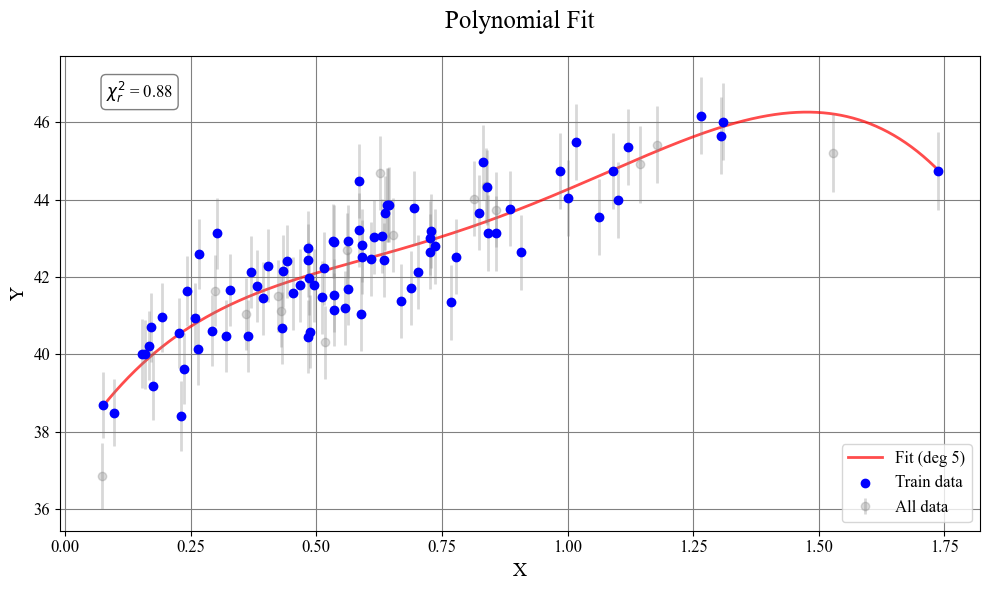

(array([ 37.25421039,  21.17993638, -37.07622952,  33.85117899,
        -11.67337427,   0.72393471]),
 array([[ 1.68720553e+00, -1.64200547e+01,  5.23799923e+01,
         -7.23798174e+01,  4.46046189e+01, -9.98930354e+00],
        [-1.64200547e+01,  1.72447362e+02, -5.75126304e+02,
          8.18435364e+02, -5.14716902e+02,  1.16928587e+02],
        [ 5.23799923e+01, -5.75126304e+02,  1.98367390e+03,
         -2.89491824e+03,  1.85476992e+03, -4.27087497e+02],
        [-7.23798174e+01,  8.18435364e+02, -2.89491824e+03,
          4.31122793e+03, -2.80546537e+03,  6.53525128e+02],
        [ 4.46046189e+01, -5.14716902e+02,  1.85476992e+03,
         -2.80546537e+03,  1.84820233e+03, -4.34588165e+02],
        [-9.98930354e+00,  1.16928587e+02, -4.27087497e+02,
          6.53525128e+02, -4.34588165e+02,  1.02938174e+02]]))

In [59]:
fitter.train(True)

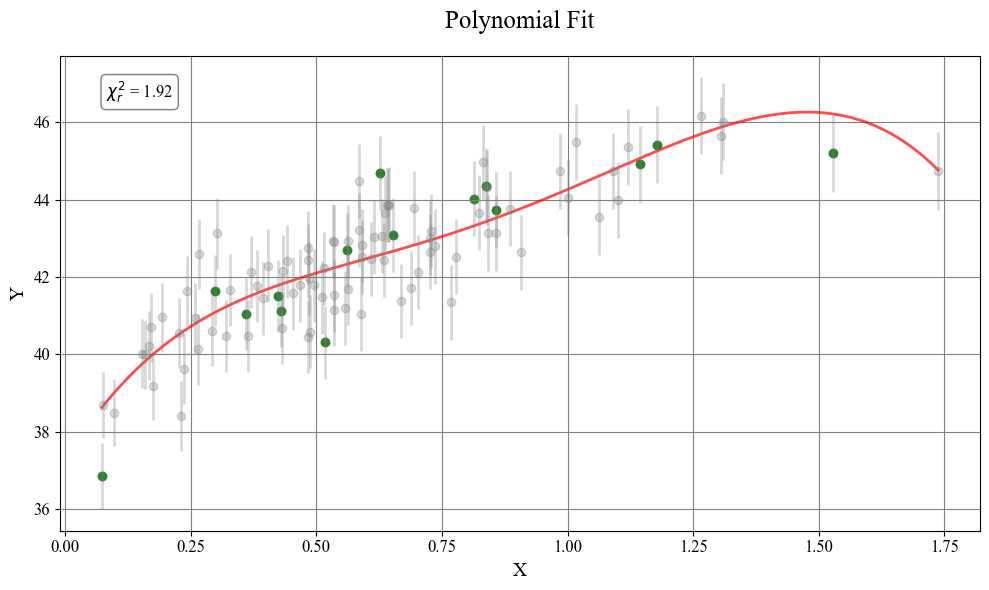

(array([ 37.25421039,  21.17993638, -37.07622952,  33.85117899,
        -11.67337427,   0.72393471]),
 array([[ 5.45161113e+00, -7.52358129e+01,  2.91909019e+02,
         -4.65134784e+02,  3.23329984e+02, -8.10606442e+01],
        [-7.52358129e+01,  1.20720669e+03, -4.91932762e+03,
          8.02765501e+03, -5.65726378e+03,  1.43061658e+03],
        [ 2.91909019e+02, -4.91932762e+03,  2.04884067e+04,
         -3.38882522e+04,  2.41004276e+04, -6.13377976e+03],
        [-4.65134784e+02,  8.02765501e+03, -3.38882522e+04,
          5.65975982e+04, -4.05401024e+04,  1.03731061e+04],
        [ 3.23329984e+02, -5.65726378e+03,  2.41004276e+04,
         -4.05401024e+04,  2.92018077e+04, -7.50456733e+03],
        [-8.10606442e+01,  1.43061658e+03, -6.13377976e+03,
          1.03731061e+04, -7.50456733e+03,  1.93532065e+03]]))

In [60]:
fitter.test(True)

In [61]:
RMS = fitter.k_fold_cross_validation()

In [62]:
RMS

(np.float64(0.8624663106123309), np.float64(0.8898057492056173))

In [63]:
train, val = [], []
for i in range(16):
    mean_train, mean_val = fitter.k_fold_cross_validation()
    train.append(mean_train)    
    val.append(mean_val)

In [64]:
import matplotlib.pyplot as plt

In [65]:
degs = range(16)

Text(0.5, 1.0, 'Validation')

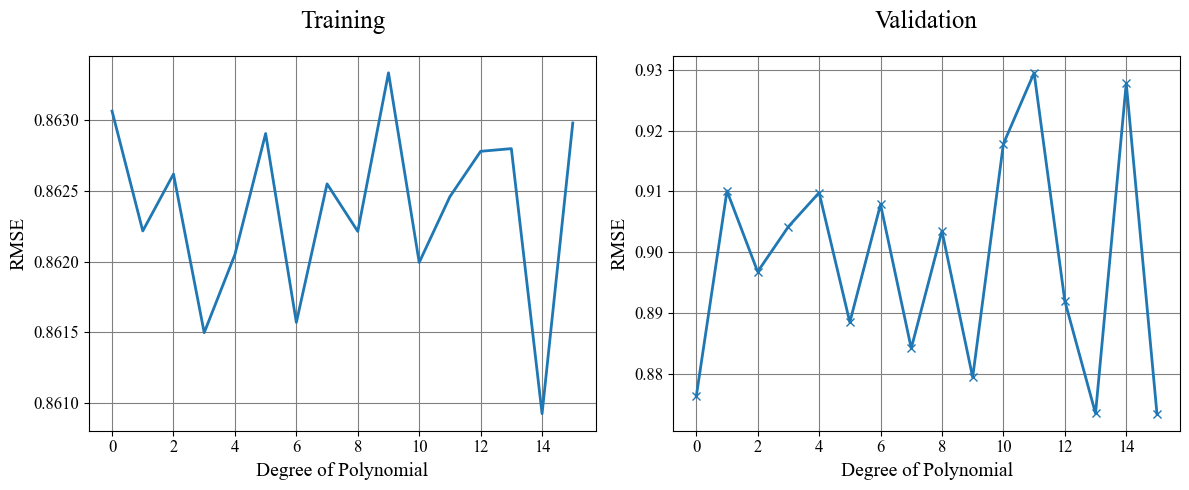

In [66]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplot(121)
plt.plot(degs, train, label="Train")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title('Training')

plt.subplot(122)
plt.plot(degs, val, marker='x', label="Validation")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title('Validation')